In [83]:
import numpy as np
import math
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

POP_SIZE = 20
N_x = 1
Interval_low = 0
Interval_high = 2

In [84]:
curr_population = np.random.uniform(low=Interval_low, high=Interval_high, size=(POP_SIZE,N_x))
print(curr_population.shape)
print(curr_population)

(20, 1)
[[0.15521371]
 [1.44608883]
 [1.48873874]
 [1.5777092 ]
 [1.65440861]
 [1.01415256]
 [0.18908204]
 [1.36718081]
 [0.89591492]
 [0.1249965 ]
 [0.57075177]
 [0.52136099]
 [0.49817961]
 [1.44457866]
 [0.11361593]
 [0.27989462]
 [0.98076359]
 [0.99000904]
 [1.99202878]
 [1.39650831]]


In [85]:
def calc_fitness(t_pop):
    fitness = []
    for i in range(len(t_pop)):
        y = t_pop[i, 0]/(np.sqrt((2*np.pi)**2 + (t_pop[i, 0])**2))  #(x-shift_x)/(np.sqrt((2*np.pi)**2 + (x-shift_x)**2)) + 0*(y-shift_y)
        fitness.append(y)
    return np.array(fitness)

In [86]:
my_fitness = calc_fitness(curr_population)
print(my_fitness.shape)
print(my_fitness)

(20,)
[0.0246955  0.22428855 0.2305567  0.24353982 0.25462843 0.15934508
 0.03007972 0.21261838 0.14116148 0.01988987 0.09046549 0.08269299
 0.07903969 0.22406608 0.01807958 0.04450248 0.15422581 0.15564461
 0.30221619 0.21696672]


In [87]:
N_MATING = 3

def select_determinstic(t_pop, t_fitness):
    idx = np.argsort(t_fitness)
    idx = idx[::-1]
    parents = t_pop[idx]
    parents = parents[:N_MATING, :]
    return (parents, calc_fitness(parents))

In [88]:
my_parents, my_par_fitness = select_determinstic(curr_population, my_fitness)
print(my_parents)
print(my_par_fitness)

[[1.99202878]
 [1.65440861]
 [1.5777092 ]]
[0.30221619 0.25462843 0.24353982]


In [89]:
N_OFFSPRING = 3
IDX_CROSSOVER = 1

def crossover(t_parents):
    offspring = np.empty((N_OFFSPRING, N_x))

    for k in range(N_OFFSPRING):
        p1_idx = k%N_MATING
        offspring[k] = t_parents[p1_idx]
        
    return (offspring, calc_fitness(offspring))

In [90]:
my_offspring,  my_offspring_fitness = crossover(my_parents)
my_parents
my_offspring

array([[1.99202878],
       [1.65440861],
       [1.5777092 ]])

array([[1.99202878],
       [1.65440861],
       [1.5777092 ]])

In [91]:
PM = 0.5
def mutation(t_offspring):
    random_mutator = np.random.uniform(0.0, 1.0, (N_OFFSPRING,))
    idx = random_mutator > PM
    nnz = np.count_nonzero(idx)
    mutated_offspring = t_offspring.copy()
    mutated_offspring[idx] += np.random.uniform(-0.5, 0.5, (nnz, N_x))

    return (mutated_offspring, calc_fitness(mutated_offspring))

In [92]:
my_mut_offspring, my_mut_offspring_fitness = mutation(my_offspring)
print(my_offspring)
print(my_mut_offspring)
print(my_mut_offspring_fitness)

[[1.99202878]
 [1.65440861]
 [1.5777092 ]]
[[1.99202878]
 [1.51252736]
 [1.62452499]]
[0.30221619 0.23404048 0.25031975]


In [93]:
def hard_constraint(t_total_pop):
    idx1 = (t_total_pop >= Interval_low)
    idx2 = (t_total_pop <= Interval_high)
    idx = idx1 & idx2
    idx = np.all(idx, axis=1)

    return t_total_pop[idx]

In [94]:
total_population = np.vstack((curr_population, my_mut_offspring))
total_population = hard_constraint(total_population)
print(total_population.shape)
print(total_population)

(23, 1)
[[0.15521371]
 [1.44608883]
 [1.48873874]
 [1.5777092 ]
 [1.65440861]
 [1.01415256]
 [0.18908204]
 [1.36718081]
 [0.89591492]
 [0.1249965 ]
 [0.57075177]
 [0.52136099]
 [0.49817961]
 [1.44457866]
 [0.11361593]
 [0.27989462]
 [0.98076359]
 [0.99000904]
 [1.99202878]
 [1.39650831]
 [1.99202878]
 [1.51252736]
 [1.62452499]]


In [95]:
def environmental_selection(t_total_pop):
    tot_fitness = calc_fitness(t_total_pop)
    idx = np.argsort(tot_fitness)
    idx = idx[::-1]
    idx = idx[:POP_SIZE]
    return t_total_pop[idx]

In [96]:
print("Before")
print(total_population.shape)
print(total_population)
print(calc_fitness(total_population))
print("After")
new_population = environmental_selection(total_population)
print(new_population.shape)
print(new_population)
print(calc_fitness(new_population))

Before
(23, 1)
[[0.15521371]
 [1.44608883]
 [1.48873874]
 [1.5777092 ]
 [1.65440861]
 [1.01415256]
 [0.18908204]
 [1.36718081]
 [0.89591492]
 [0.1249965 ]
 [0.57075177]
 [0.52136099]
 [0.49817961]
 [1.44457866]
 [0.11361593]
 [0.27989462]
 [0.98076359]
 [0.99000904]
 [1.99202878]
 [1.39650831]
 [1.99202878]
 [1.51252736]
 [1.62452499]]
[0.0246955  0.22428855 0.2305567  0.24353982 0.25462843 0.15934508
 0.03007972 0.21261838 0.14116148 0.01988987 0.09046549 0.08269299
 0.07903969 0.22406608 0.01807958 0.04450248 0.15422581 0.15564461
 0.30221619 0.21696672 0.30221619 0.23404048 0.25031975]
After
(20, 1)
[[1.99202878]
 [1.99202878]
 [1.65440861]
 [1.62452499]
 [1.5777092 ]
 [1.51252736]
 [1.48873874]
 [1.44608883]
 [1.44457866]
 [1.39650831]
 [1.36718081]
 [1.01415256]
 [0.99000904]
 [0.98076359]
 [0.89591492]
 [0.57075177]
 [0.52136099]
 [0.49817961]
 [0.27989462]
 [0.18908204]]
[0.30221619 0.30221619 0.25462843 0.25031975 0.24353982 0.23404048
 0.2305567  0.22428855 0.22406608 0.216966

In [97]:
best_outputs = []
num_generations = 100
curr_population = np.random.uniform(low=0.0, high=2.0, size=(POP_SIZE,N_x))
overall_min_fitness = 99999

# Run many iterations
# You should also have another convergence check
for generation in range(num_generations):
    print("Generation : ", generation)

    # Measuring the fitness of each chromosome in the population.
    fitness = calc_fitness(curr_population)

    # print("Fitness")
    # print(fitness)

    max_fitness = np.max(fitness)

    # The best result in the current iteration.
    print("Best result in current iteration {0} compared to overall {1}".format(max_fitness, max(max_fitness, overall_min_fitness)))
    best_outputs.append(max_fitness)
    
    # Selecting the best parents in the population for mating.
    parents, _ = select_determinstic(curr_population, fitness)
#     parents, _ = select_stochastic(curr_population, fitness)
    
    # print("Parents")
    # print(parents)

    # Generating next generation using crossover.
    offspring_crossed, _ = crossover(parents)

    # print("Crossover")
    # print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutated, _ = mutation(offspring_crossed)

    # print("Mutation")
    # print(offspring_mutation)

    # Check for constraints
    total_population = np.vstack((curr_population, offspring_mutated))
    total_population = hard_constraint(total_population)

    # Environmental selection
    curr_population = environmental_selection(total_population)
              
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = calc_fitness(curr_population)

# Then return the index of that solution corresponding to the best fitness.
max_idx = np.argmax(fitness)

output = np.array(best_outputs)

print(curr_population)
print(fitness)
print(max_idx)
print(output.shape)
print("Best solution : ", curr_population[max_idx, :])
print("Best solution fitness : ", fitness[max_idx])

Generation :  0
Best result in current iteration 0.2795965149366501 compared to overall 99999
Generation :  1
Best result in current iteration 0.2795965149366501 compared to overall 99999
Generation :  2
Best result in current iteration 0.29342511651881825 compared to overall 99999
Generation :  3
Best result in current iteration 0.29342511651881825 compared to overall 99999
Generation :  4
Best result in current iteration 0.29342511651881825 compared to overall 99999
Generation :  5
Best result in current iteration 0.29467091420251507 compared to overall 99999
Generation :  6
Best result in current iteration 0.29467091420251507 compared to overall 99999
Generation :  7
Best result in current iteration 0.29467091420251507 compared to overall 99999
Generation :  8
Best result in current iteration 0.29467091420251507 compared to overall 99999
Generation :  9
Best result in current iteration 0.3013019174234595 compared to overall 99999
Generation :  10
Best result in current iteration 0.3

<Figure size 1200x1200 with 0 Axes>

Text(0.5, 0, 'Iteration')

Text(0, 0.5, 'Fitness')

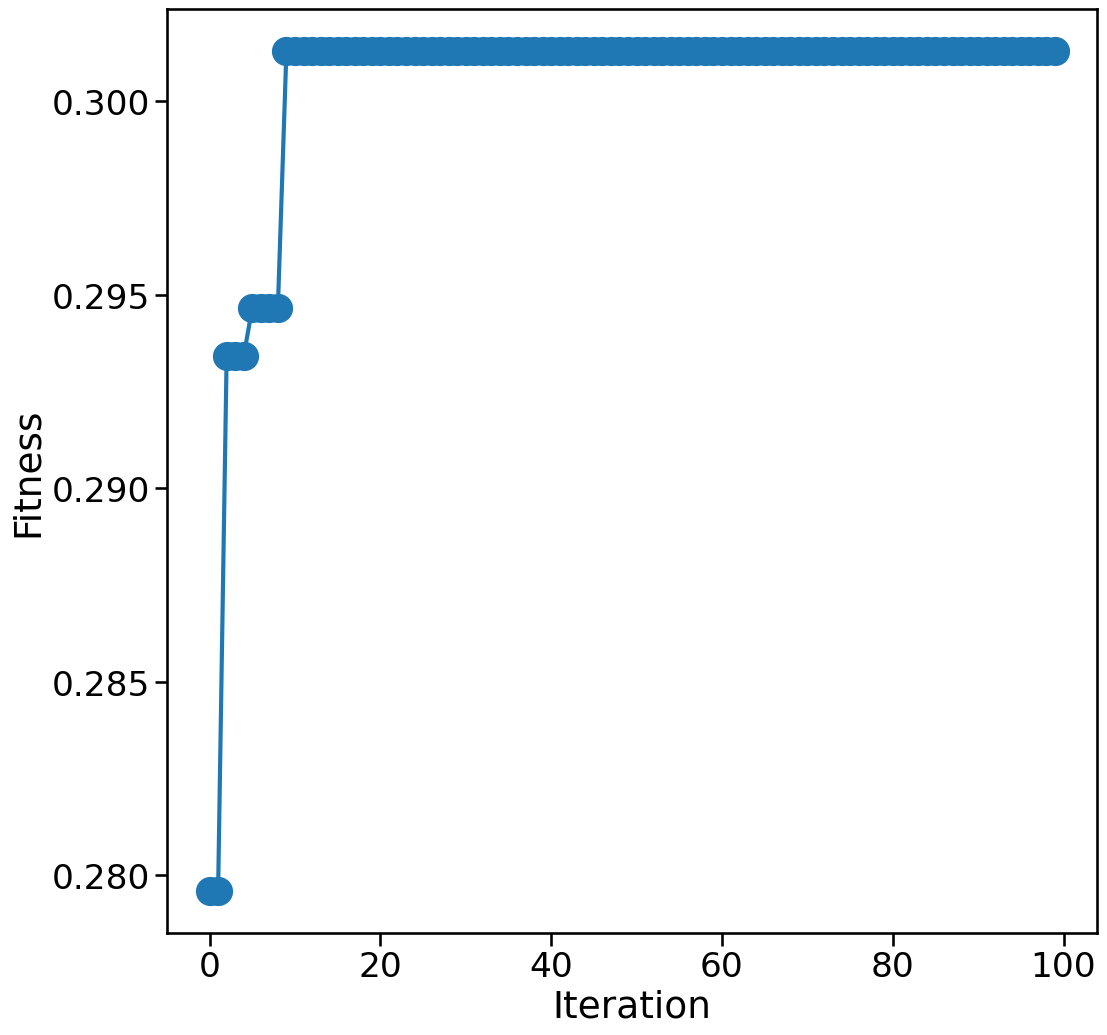

In [98]:
import pylab as plt
import seaborn as sns
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})

%matplotlib inline
plt.figure(figsize=(12,12))
plt.plot(best_outputs,'-o', lw=3, ms=20, label='from scratch')
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.show()